# Exploratory Data Analysis on Dataset - Terrorism

Performer -** Naman Sahu**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpt
import plotly.offline as py
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df=pd.read_csv('/content/drive/MyDrive/data/Global Terrorism - START data.zip',encoding='ISO-8859-1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [10]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [14]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
df['casualities']=df['Killed']+df['Wounded']
df.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [16]:
print('Country with Highest Terrorist Attacks:',df['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',df['Killed'].max(),'that took place in :',df.loc[df['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in : Iraq


# Data Visualisation

**Terror Activites Per Year**

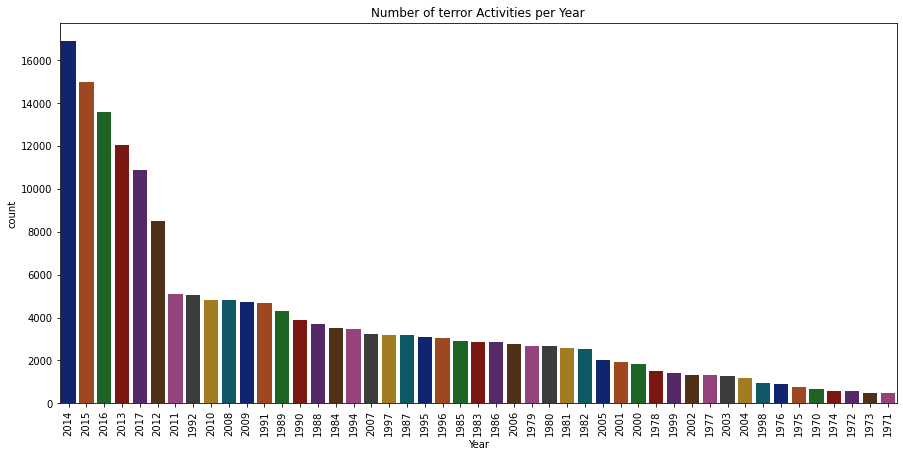

In [37]:
from seaborn import palettes
plt.figure(figsize=(15,7))
sns.countplot('Year',data=df,palette='dark',order=df['Year'].value_counts().index)
plt.title("Number of terror Activities per Year")
plt.xticks(rotation=90)
plt.show()

**Attack types Used**

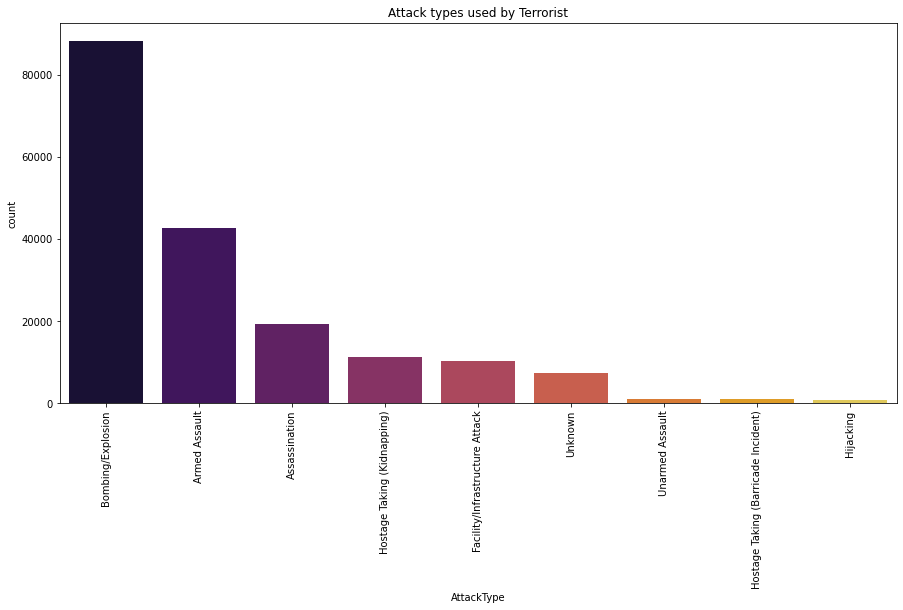

In [29]:
plt.figure(figsize=(15,7))
sns.countplot('AttackType',data=df,order=df['AttackType'].value_counts().index,palette='inferno')
plt.title("Attack types used by Terrorist")
plt.xticks(rotation=90)
plt.show()

**Types of People Targeted**

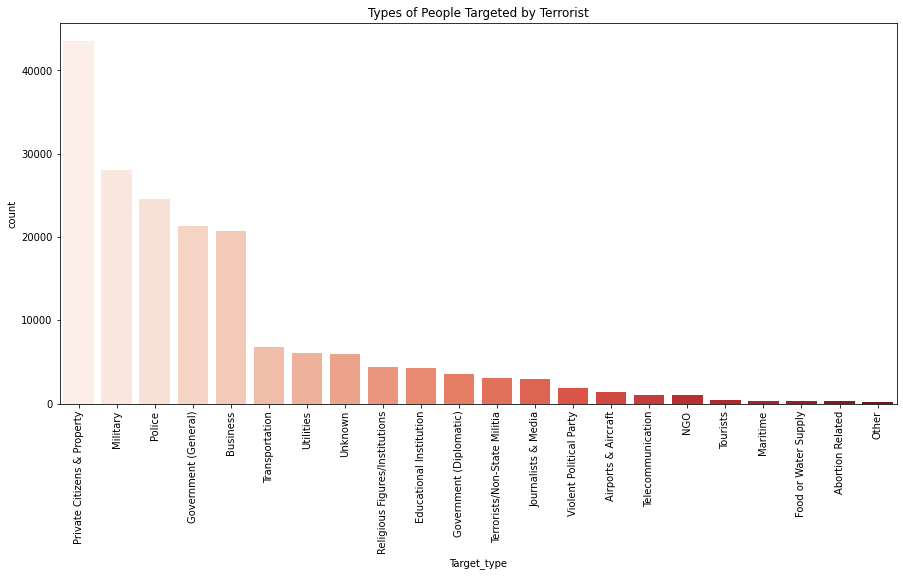

In [34]:
plt.figure(figsize=(15,7))
sns.countplot('Target_type',data=df,order=df['Target_type'].value_counts().index,palette='Reds')
plt.title("Types of People Targeted by Terrorist")
plt.xticks(rotation=90)
plt.show()

**Most Affected Regions**

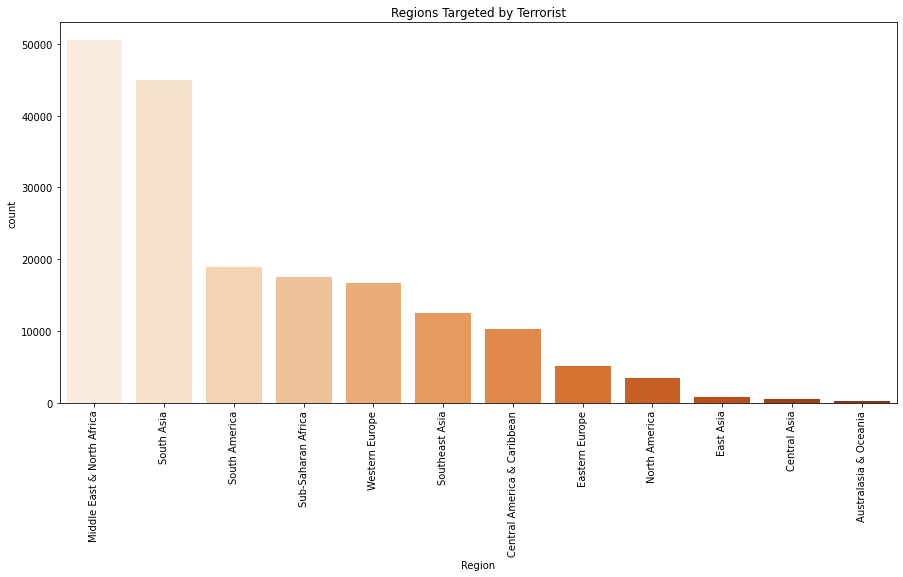

In [39]:
plt.figure(figsize=(15,7))
sns.countplot('Region',data=df,order=df['Region'].value_counts().index,palette='Oranges')
plt.title("Regions Targeted by Terrorist")
plt.xticks(rotation=90)
plt.show()

**Top Countries Targeted**

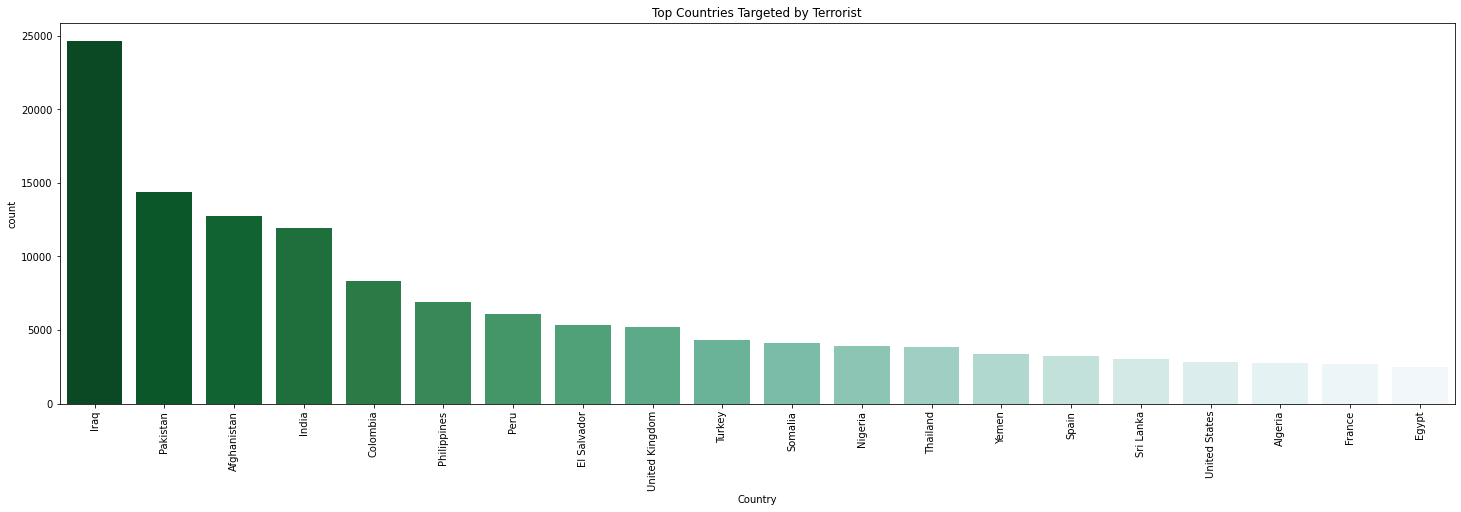

In [44]:
plt.figure(figsize=(25,7))
sns.countplot('Country',data=df,order=df['Country'].value_counts().index[:20],palette='BuGn_r')
plt.title("Top Countries Targeted by Terrorist")
plt.xticks(rotation=90)
plt.show()

**Terrorist Groups with Highest Terror Attacks**

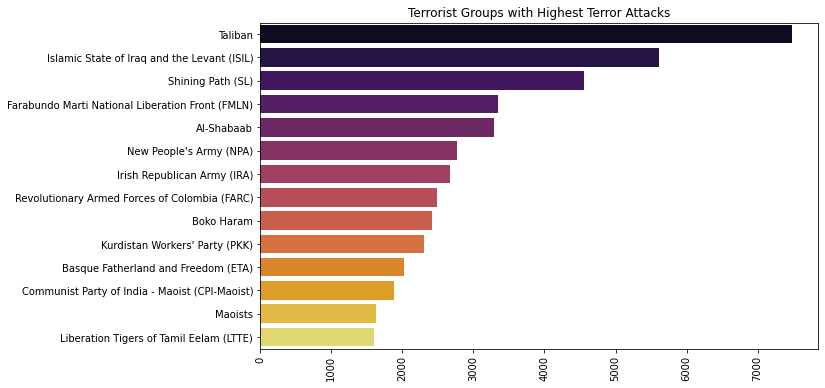

In [48]:
plt.figure(figsize=(25,7))
sns.barplot(df['Group'].value_counts()[1:15].values,df['Group'].value_counts()[1:15].index,palette=('inferno'))
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.title("Terrorist Groups with Highest Terror Attacks")
plt.xticks(rotation=90)
plt.show()

# End of Task 4